Neccessory Imports

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score, mean_squared_error
from sklearn.model_selection import train_test_split

Loading and Cleaning the dataset

In [40]:
def load_data():
    """Load and merge the student datasets."""
    math_df = pd.read_csv("student-mat.csv")
    por_df = pd.read_csv("student-por.csv")
    return pd.concat([math_df, por_df])

def clean_data(data):
    """Drop unnecessary columns for clustering and encoding."""
    cols_to_drop = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 
                    'nursery', 'higher', 'internet', 'romantic']
    return data.drop(cols_to_drop, axis=1)
# Load and clean the data
student_data = load_data()
cleaned_data = clean_data(student_data)

Line PLot Graph

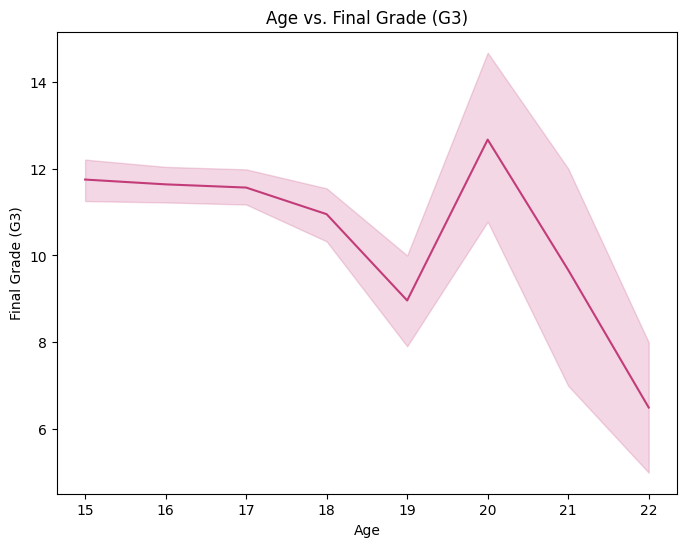

In [41]:
def plot_relational_graph(data):
    """Create a line plot of age vs. final grade (G3)."""
    plt.figure(figsize=(8, 6))
    sns.lineplot(x='age', y='G3', data=data, color='#C33B78')
    plt.title('Age vs. Final Grade (G3)')
    plt.xlabel('Age')
    plt.ylabel('Final Grade (G3)')
    plt.show()
    
plot_relational_graph(cleaned_data)

Categorial Graph - Histogram

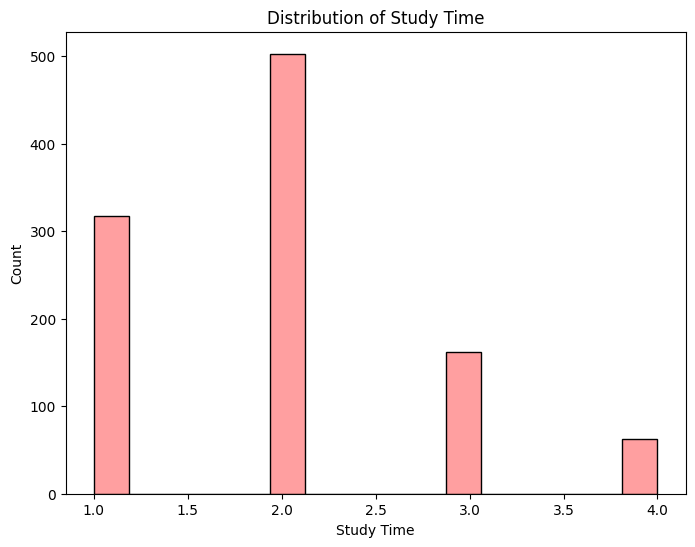

In [42]:

def plot_categorical_graph(data):
    """Create a histogram of study time distribution."""
    plt.figure(figsize=(8, 6))
    sns.histplot(data['studytime'], color='#FF7F80')
    plt.title('Distribution of Study Time')
    plt.xlabel('Study Time')
    plt.ylabel('Count')
    plt.show()
plot_categorical_graph(cleaned_data)

Statistical Graph - Heatmap

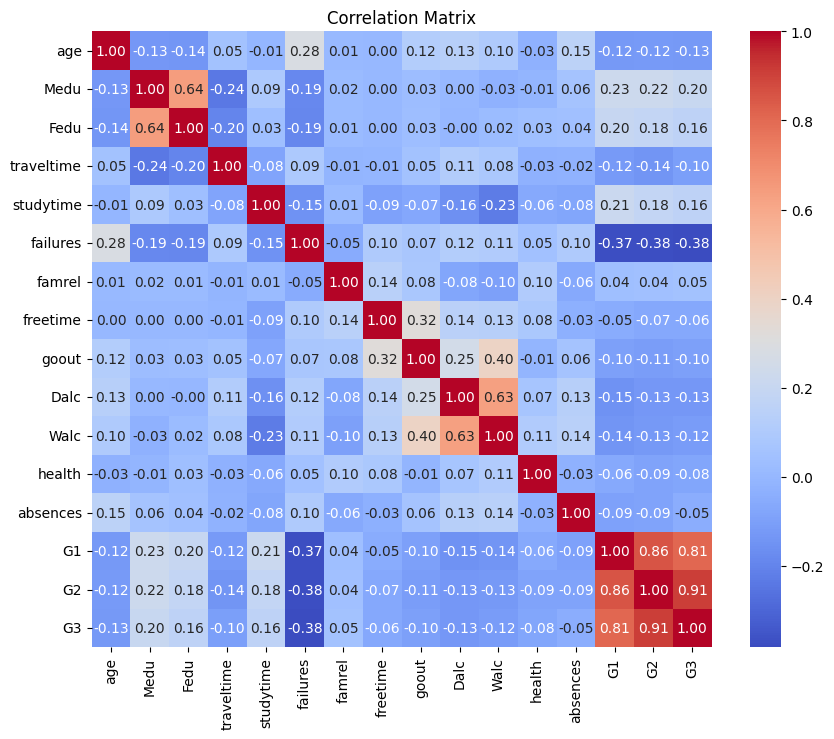

In [43]:
def plot_statistical_graph(data):
    """Create a heatmap of the correlation matrix."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()
plot_statistical_graph(cleaned_data)

Clustering

In [49]:
def perform_clustering(data):
    """Perform K-means clustering on the data."""
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    kmeans = KMeans(n_clusters=3, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    # Create a copy of the DataFrame to avoid SettingWithCopyWarning
    clustered_data = data.copy()
    clustered_data['Cluster'] = cluster_labels
    
    centroids = kmeans.cluster_centers_
    return clustered_data, scaled_data, centroids

# Call the function with cleaned data
clustered_data, scaled_data, centroids = perform_clustering(cleaned_data[['age', 'G3']])

# Print clustering results
print("Clustering Results:")
print("K-Means clustering categorized students into three distinct clusters:")
for i in range(3):
    num_students = (clustered_data['Cluster'] == i).sum()
    print(f"Cluster {i}: {num_students} students")
    
silhouette_score = silhouette_score(scaled_data, clustered_data['Cluster'])
print(f"The silhouette score of {silhouette_score:.3f} indicates a weak cluster separation.")
print("This suggests that the clusters might not be very distinct, and exploring different numbers of clusters (k) or alternative clustering algorithms might improve the grouping.")


Clustering Results:
K-Means clustering categorized students into three distinct clusters:
Cluster 0: 511 students
Cluster 1: 453 students
Cluster 2: 80 students
The silhouette score of 0.417 indicates a weak cluster separation.
This suggests that the clusters might not be very distinct, and exploring different numbers of clusters (k) or alternative clustering algorithms might improve the grouping.


C:\Users\Super\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Plot

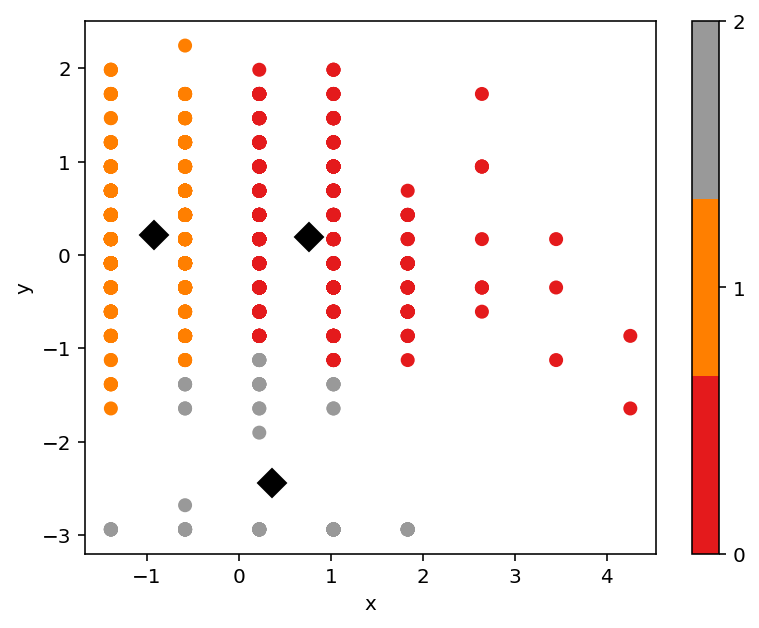

In [45]:
def plot_clusters(scaled_data, centroids, data):
    """
    Plots clustered data as a scatter plot
    """
    x = scaled_data[:, 0]
    y = scaled_data[:, 1]
    nclust = data['Cluster']

    # creating a custom colormap for plotting
    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(nclust))))
    cmap = ListedColormap(colours)

    fig, ax = plt.subplots(dpi=144)
    s = ax.scatter(x, y, c=nclust, cmap=cmap, marker='o')
    ax.plot(centroids[:, 0], centroids[:, 1], 'kD', ms=10) 

    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(nclust))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()
    return

   
# Plot clusters
plot_clusters(scaled_data, centroids, clustered_data)


Fitting

In [46]:
def perform_fitting(data):
    """Perform linear regression to fit study time and final grade."""
    X = data[['studytime']]
    y = data['G3']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    return lr_model, X_test, y_test
# Fitting
lr_model, X_test, y_test = perform_fitting(cleaned_data)
print("Linear Regression Model Coefficients:", lr_model.coef_)
print("Linear Regression Model Intercept:", lr_model.intercept_)

Linear Regression Model Coefficients: [0.75504639]
Linear Regression Model Intercept: 9.929304045606635


Fitting Plot

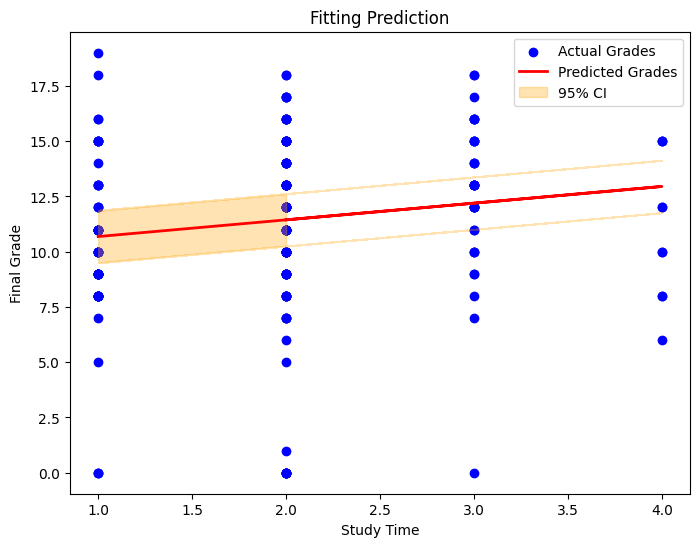

In [47]:
def plot_fitting_prediction(lr_model, X_test, y_test):
    """Plot fitting predictions with uncertainties."""
    y_pred = lr_model.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual Grades')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Grades')
    
    # Plot confidence interval
    confidence_interval = 1.96 * np.std(y_pred)  # 95% confidence interval
    plt.fill_between(X_test.squeeze(), y_pred - confidence_interval, y_pred + confidence_interval, color='orange', alpha=0.3, label='95% CI')
    plt.title('Fitting Prediction')
    plt.xlabel('Study Time')
    plt.ylabel('Final Grade')
    plt.legend()
    plt.show()


plot_fitting_prediction(lr_model, X_test, y_test)

Fitting Quality

In [48]:

def evaluate_fitting(lr_model, X_test, y_test):
    """Evaluate fitting quality using mean squared error."""
    y_pred = lr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse
# Fitting Quality
mse = evaluate_fitting(lr_model, X_test, y_test)
print("Mean Squared Error:", mse)


Mean Squared Error: 15.2578114835105
